# Author: Eoghan O'Connor

## Task
This jupyterNotebook runs on AWS sageMaker. Needs access to S3 bucket.
  <ul>
    <li>loads csv data from the AWS S3 storage space and produces an outlier report</li>
    <li>gets hystory rates from the marketplace CryptoCompare.com and produces an outlier report</li>
    <li>Get live-exchange cryptocurrency rates from the marketplace CryptoCompare.com on every 30 sec </li>
        <li>Store these cryptocurrency rates.</li>
    <li>Detect outliers among these cryptocurrency rates.</li>
  </ul>
  <br>
The following unsupervised learning methods are used for outlier detection
<ul><li>Enhanced Dixon Q</li>
<li>Mean & Standard Deviation</li>
<li>Isolation Forest</li>
<li>Boxplots Method</li>
<li>DBSCAN Clustering Method</li>
</ul></li>  </ul>  
</ol>

## Implementation 

### Libraries to Use

#### Method #1: Dixon Q Test

In [1]:

from scipy.stats import shapiro

"""
 *
 * This class implements an enhanced version of DixonQ Test.
 * Provides a set of encoded critical values - up to 100.
 * The encoded critical values are used as a basis to generate critical values for other alphas (levels of confidence).
 * Both encoded and generated critical values are used to produce a result of maximum accuracy when identifying outliers. 
 *  
""" 
class DixonQEnhanced:
    
    criticalValues = {}


    """
     * DixonQEnhanced constructor
    """ 
    def __init__(self):
        self.buildCriticalValues()


    """
     * Builds a dictionary of critical values grouped by alpha  
    """
    def buildCriticalValues(self):
        
        """
         * the critical values are grouped by an alpha key
         * alpha is the probability of incorrectly rejecting the suspected outlier
        """    
        #encoded critical values for alpha = 0.3 (0.7% level of confidence)
        self.criticalValues[0.30] = [0,0,
                                     0.6836,0.4704,0.3730,0.3173,0.2811,0.2550,0.2361,0.2208,
                                     0.2086,0.1983,0.1898,0.1826,0.1764,0.1707,0.1656,0.1613,
                                     0.1572,0.1535,0.1504,0.1474,0.1446,0.1420,0.1397,0.1376,
                                     0.1355,0.1335,0.1318,0.1300,0.1283,0.1268,0.1255,0.1240,
                                     0.1227,0.1215,0.1202,0.1192,0.1181,0.1169,0.1160,0.1153,
                                     0.1141,0.1134,0.1124,0.1116,0.1108,0.1102,0.1093,0.1087,
                                     0.1079,0.1071,0.1067,0.1060,0.1052,0.1047,0.1041,0.1036,
                                     0.1030,0.1024,0.1019,0.1014,0.1009,0.1004,0.1000,0.0997,
                                     0.0991,0.0987,0.0982,0.0979,0.0974,0.0970,0.0967,0.0961,
                                     0.0960,0.0955,0.0952,0.0948,0.0943,0.0939,0.0937,0.0935,
                                     0.0930,0.0928,0.0925,0.0921,0.0918,0.0915,0.0913,0.0910,
                                     0.0906,0.0903,0.0902,0.0899,0.0896,0.0894,0.0892,0.0890,
                                     0.0887,0.0885]
        
        #encoded critical values for alpha = 0.2 (0.8% level of confidence)
        self.criticalValues[0.20] = [0,0,
                                     0.7808,0.5603,0.4508,0.3868,0.3444,0.3138,0.2915,0.2735,
                                     0.2586,0.2467,0.2366,0.2280,0.2202,0.2137,0.2077,0.2023,
                                     0.1973,0.1929,0.1890,0.1854,0.1820,0.1790,0.1761,0.1735,
                                     0.1710,0.1687,0.1664,0.1645,0.1624,0.1604,0.1590,0.1571,
                                     0.1555,0.1540,0.1525,0.1512,0.1499,0.1484,0.1472,0.1462,
                                     0.1449,0.1441,0.1430,0.1418,0.1408,0.1400,0.1390,0.1381,
                                     0.1374,0.1365,0.1357,0.1349,0.1340,0.1334,0.1326,0.1320,
                                     0.1312,0.1304,0.1299,0.1294,0.1286,0.1281,0.1275,0.1272,
                                     0.1264,0.1260,0.1254,0.1249,0.1243,0.1238,0.1234,0.1228,
                                     0.1225,0.1221,0.1217,0.1212,0.1205,0.1201,0.1198,0.1195,
                                     0.1189,0.1187,0.1182,0.1178,0.1174,0.1171,0.1167,0.1165,
                                     0.1160,0.1156,0.1154,0.1151,0.1147,0.1144,0.1141,0.1138,
                                     0.1134,0.1131]        

        #encoded critical values for alpha = 0.1 (0.9% level of confidence)
        self.criticalValues[0.10] = [0,0,
                                     0.8850,0.6789,0.5578,0.4840,0.4340,0.3979,0.3704,0.3492,
                                     0.3312,0.3170,0.3045,0.2938,0.2848,0.2765,0.2691,0.2626,
                                     0.2564,0.2511,0.2460,0.2415,0.2377,0.2337,0.2303,0.2269,
                                     0.2237,0.2208,0.2182,0.2155,0.2132,0.2110,0.2088,0.2066,
                                     0.2045,0.2026,0.2008,0.1993,0.1974,0.1958,0.1944,0.1930,
                                     0.1915,0.1902,0.1890,0.1875,0.1865,0.1850,0.1839,0.1829,
                                     0.1819,0.1808,0.1797,0.1788,0.1777,0.1768,0.1759,0.1752,
                                     0.1741,0.1733,0.1726,0.1717,0.1707,0.1703,0.1694,0.1689,
                                     0.1679,0.1674,0.1667,0.1660,0.1652,0.1648,0.1641,0.1635,
                                     0.1631,0.1626,0.1620,0.1613,0.1605,0.1601,0.1596,0.1594,
                                     0.1586,0.1583,0.1576,0.1573,0.1567,0.1563,0.1557,0.1554,
                                     0.1547,0.1544,0.1540,0.1537,0.1532,0.1528,0.1524,0.1521,
                                     0.1516,0.1512]        

        #encoded critical values for alpha = 0.05 (0.95% level of confidence)
        self.criticalValues[0.05] = [0,0,
                                     0.9411,0.7651,0.6423,0.5624,0.5077,0.4673,0.4363,0.4122,
                                     0.3922,0.3755,0.3615,0.3496,0.3389,0.3293,0.3208,0.3135,
                                     0.3068,0.3005,0.2947,0.2895,0.2851,0.2804,0.2763,0.2725,
                                     0.2686,0.2655,0.2622,0.2594,0.2567,0.2541,0.2513,0.2488,
                                     0.2467,0.2445,0.2423,0.2408,0.2383,0.2366,0.2350,0.2334,
                                     0.2319,0.2302,0.2288,0.2273,0.2257,0.2241,0.2228,0.2216,
                                     0.2206,0.2191,0.2182,0.2169,0.2160,0.2145,0.2135,0.2126,
                                     0.2116,0.2106,0.2095,0.2085,0.2075,0.2070,0.2057,0.2053,
                                     0.2045,0.2037,0.2030,0.2020,0.2013,0.2005,0.1996,0.1990,
                                     0.1984,0.1980,0.1973,0.1964,0.1955,0.1950,0.1943,0.1940,
                                     0.1934,0.1927,0.1922,0.1918,0.1909,0.1906,0.1899,0.1896,
                                     0.1887,0.1885,0.1881,0.1876,0.1869,0.1865,0.1860,0.1856,
                                     0.1851,0.1846]        

        #encoded critical values for alpha = 0.02 (0.98% level of confidence)
        self.criticalValues[0.02] = [0,0,
                                     0.9763,0.8457,0.7291,0.6458,0.5864,0.5432,0.5091,0.4813,
                                     0.4591,0.4405,0.4250,0.4118,0.3991,0.3883,0.3792,0.3711,
                                     0.3630,0.3562,0.3495,0.3439,0.3384,0.3328,0.3287,0.3242,
                                     0.3202,0.3163,0.3127,0.3093,0.3060,0.3036,0.2999,0.2973,
                                     0.2948,0.2921,0.2898,0.2879,0.2853,0.2836,0.2815,0.2794,
                                     0.2778,0.2758,0.2744,0.2726,0.2711,0.2690,0.2676,0.2662,
                                     0.2651,0.2632,0.2620,0.2606,0.2595,0.2582,0.2570,0.2555,
                                     0.2545,0.2531,0.2522,0.2510,0.2500,0.2493,0.2480,0.2472,
                                     0.2466,0.2457,0.2445,0.2436,0.2429,0.2420,0.2409,0.2402,
                                     0.2398,0.2387,0.2382,0.2372,0.2365,0.2360,0.2349,0.2345,
                                     0.2337,0.2330,0.2322,0.2319,0.2309,0.2304,0.2298,0.2294,
                                     0.2285,0.2279,0.2272,0.2272,0.2259,0.2257,0.2251,0.2247,
                                     0.2240,0.2234]        

        #encoded critical values for alpha = 0.01 (0.99% level of confidence)
        self.criticalValues[0.01] = [0,0,
                                     0.9881,0.8886,0.7819,0.6987,0.6371,0.5914,0.5554,0.5260,
                                     0.5028,0.4831,0.4664,0.4517,0.4385,0.4268,0.4166,0.4081,
                                     0.4002,0.3922,0.3854,0.3789,0.3740,0.3674,0.3625,0.3583,
                                     0.3543,0.3499,0.3460,0.3425,0.3390,0.3357,0.3323,0.3294,
                                     0.3266,0.3238,0.3213,0.3187,0.3163,0.3141,0.3124,0.3102,
                                     0.3081,0.3061,0.3050,0.3028,0.3009,0.2991,0.2972,0.2960,
                                     0.2941,0.2927,0.2920,0.2899,0.2880,0.2873,0.2859,0.2845,
                                     0.2828,0.2816,0.2812,0.2792,0.2784,0.2775,0.2766,0.2754,
                                     0.2742,0.2735,0.2724,0.2714,0.2709,0.2696,0.2682,0.2677,
                                     0.2667,0.2662,0.2656,0.2646,0.2637,0.2633,0.2621,0.2614,
                                     0.2608,0.2599,0.2588,0.2584,0.2573,0.2568,0.2566,0.2558,
                                     0.2548,0.2543,0.2539,0.2535,0.2524,0.2521,0.2512,0.2513,
                                     0.2499,0.2498]   
        
        #encoded critical values for alpha = 0.005 (0.995% level of confidence)
        self.criticalValues[0.005] = [0,0,
                                     0.9940,0.9201,0.8234,0.7437,0.6809,0.6336,0.5952,0.5668,
                                     0.5416,0.5208,0.5034,0.4869,0.4739,0.4614,0.4504,0.4423,
                                     0.4333,0.4247,0.4173,0.4109,0.4051,0.3986,0.3935,0.3889,
                                     0.3843,0.3801,0.3762,0.3718,0.3685,0.3646,0.3610,0.3583,
                                     0.3548,0.3522,0.3498,0.3465,0.3443,0.3415,0.3400,0.3377,
                                     0.3353,0.3332,0.3325,0.3298,0.3279,0.3256,0.3235,0.3225,
                                     0.3204,0.3191,0.3177,0.3163,0.3140,0.3136,0.3118,0.3098,
                                     0.3089,0.3075,0.3071,0.3061,0.3041,0.3031,0.3025,0.3006,
                                     0.2996,0.2990,0.2983,0.2968,0.2959,0.2946,0.2934,0.2932,
                                     0.2922,0.2912,0.2905,0.2897,0.2885,0.2876,0.2870,0.2859,
                                     0.2852,0.2844,0.2836,0.2832,0.2818,0.2811,0.2808,0.2798,
                                     0.2790,0.2788,0.2784,0.2775,0.2766,0.2764,0.2755,0.2751,
                                     0.2738,0.2737]   

        """
         * Generates all critical values by using the encoded values as a basis.
         * Values are genereated between any two existing pairs of alphas.
        """ 
        #generate range alpha 0.2 - 0.1
        self.generateCriticalValuesForAlphaPair(0.2,0.1)

        #generate range alpha 0.3 - 0.2
        self.generateCriticalValuesForAlphaPair(0.3,0.2)

        #generate range alpha 0.10 - 0.05
        self.generateCriticalValuesForAlphaPair(0.10,0.05)

        #generate range alpha 0.05 - 0.02
        self.generateCriticalValuesForAlphaPair(0.05,0.02)
        
        
    """
     * Generates the missing series of critical values between two alphas with a step = 0.01
     * constraint: alpha1 > alpha2
    """ 
    def generateCriticalValuesForAlphaPair(self, alpha1, alpha2):
        
        if alpha1 < alpha2:
            raise Exception('The value of alpha1 is less than alpha2.')
            
        nInsideAlphas = int(round((alpha1 - alpha2)/(0.01)) - 1)
        
        insideAlphas = []
        
        step = 0.01
        for i in range(1,nInsideAlphas+1):
            newAlpha = round(alpha2 + i*step,2)
            insideAlphas.append(newAlpha) 
        
        for index in range(2,100):

            rangeLeft = self.criticalValues[alpha1][index]
            rangeRight = self.criticalValues[alpha2][index]
        
            distance = round(((rangeRight - rangeLeft)/(nInsideAlphas+1)),4)
            
            currentValue = self.criticalValues[alpha1][index]
            
            for insideAlpha in insideAlphas:
                
                if insideAlpha not in self.criticalValues.keys():
                    self.criticalValues[insideAlpha] = []
                    self.criticalValues[insideAlpha].append(0)
                    self.criticalValues[insideAlpha].append(0)
                
                currentValue += distance
                
                currentValue = round(currentValue,4)
                
                self.criticalValues[insideAlpha].append(currentValue)      
                
    """
     * Finds the next element in a series of elements
    """
    def findNextInSeries(self, number, series):
        
        result = -1
        
        try:
            index = np.abs(series.values - number).argmin()
        except ValueError as e:
            raise Exception('The number has not been found in the series.')

        if index == (len(series) - 1):
            result = index - 1
        else:
            result = index + 1

        return result

        
    """
     * Finds the previous element in a series of elements
    """
    def findPreviousInSeries(self, number, series):
        
        result = -1
        
        try:
            index = np.abs(series.values - number).argmin()
        except ValueError as e:
            raise Exception('The number has not been found in the series.')

        if index == 0:
            result = index + 1
        else:
            result = index - 1

        return result

        
    """
     * Identifies if a number is outlier within a series and for particular alpha
    """
    def isOutlier(self, number, series, alpha):
                
        qCritical = 0.0
        
        qExpDivisor = series[len(series)-1] - series[0]
        
        if qExpDivisor == 0:
            return False
        
        if len(series) > 100:
            return False

        nextNumberGap = abs(number - series[self.findNextInSeries(number,series)])
        prevNumberGap = abs(number - series[self.findPreviousInSeries(number,series)])
        if prevNumberGap < nextNumberGap:
            closestNumberGap = prevNumberGap
        else:
            closestNumberGap = nextNumberGap
            
        qExp = closestNumberGap/qExpDivisor
        
        if alpha in self.criticalValues.keys():
            qCritical = self.criticalValues[alpha][len(series)-1]
            
        if qExp > qCritical:
            return True
        else:
            return False
        

    """
     * Identifies all the outliers within a series
     * Uses the isOutlier method
    """
    def findOutliers(self, series):
        
        outliers = {}
        
        for alpha in self.criticalValues.keys():            
            for number in series:
                if self.isOutlier(number,series,alpha):
                    if number in outliers:
                        if outliers[number] < (1-alpha):
                            outliers[number] = (1-alpha)
                    else:
                        outliers[number] = (1-alpha)
                        
        return outliers
    
    
    """
     * Checks if the data set is normally distributed;
     * running DixonQ Test on different distributions will lead to erroneous results
     *
     * Runs a Shapiro-Wilk test to check if the series is Gaussian
    """    
    def checkForNormalDisribution(self, series):
        
        print("Shapiro-Wilk: Running Shapiro-Wilk test ....")
        
        stat, p = shapiro(series)
        
        alpha = 0.05
        
        if p > alpha:       
            print("Shapiro-Wilk: Series looks Gaussian")
            print("")
            return True

        else:
            print("Shapiro-Wilk: Series does not look Gaussian")
            print("")
            return False
        
        
    """
     * Executes DixonQ Test on the provided series of numbers;
     * DixonQ Test is executed for all available alpha keys (levels of confidence)
    """ 
    def execute(self, series):
        
        outliers = {}

        series.sort(reverse=False)
        
        if not self.checkForNormalDisribution(series):
            print("DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.")

        outliers = self.findOutliers(series)
        
        return outliers        

#### Method #2: Mean & Standard Deviation

In [2]:
import numpy as np
#import matplotlib.pyplot as plt


"""
 * This class implements the Standard Deviation Method for detecting outliers
"""
class StandardDeviationMethod:
    
    
    methodName = "StandardDeviationMethod"
    
    upperLimit = 0.0
    lowerLimit = 0.0
    seriesStd = 0.0
    seriesMean = 0.0
    

    """
     *
    """ 
    def __init__(self):
        
        pass
    
    
    """
     *
    """ 
    def getMethodName(self):
        return "Standard Deviation Method"

        
    """
     * Function to detect outliers on one-dimentional datasets
    """
    def execute(self, series):
        
        outliers = []
    
        # set upper and lower limits to 3 times the standard deviation
        seriesStd = np.std(series)
        seriesMean = np.mean(series)
        #anomalyCutOff = seriesStd * 3
        #anomalyCutOff = seriesStd * 2
        #anomalyCutOff = seriesStd * 1.5
        #anomalyCutOff = seriesStd * 1.75
        anomalyCutOff = seriesStd * 2.5
        
        lowerLimit  = seriesMean - anomalyCutOff 
        upperLimit = seriesMean + anomalyCutOff
        
        #print(lowerLimit)
        
        self.upperLimit = upperLimit
        self.lowerLimit = lowerLimit
        self.seriesStd = seriesStd
        self.seriesMean = seriesMean

        # generate outliers
        for outlier in series:
            if outlier > upperLimit or outlier < lowerLimit:
                outliers.append(outlier)
                
        return outliers

#### Method #3: Isolation Forest

In [3]:
from sklearn.ensemble import IsolationForest
import pandas as pd

"""
 * This class implements the Isolation Forest Method for detecting outliers
"""
class IsolationForestMethod:

    """
     *
    """ 
    def __init__(self):       
        pass

    
    """
     *
    """ 
    def checkAllElementsEqual(self, series):
        return len(set(series)) <= 1
    

    """
     * Function to detect outliers on one-dimentional datasets
    """
    def execute(self, series):
        outliers = []
        
        if not self.checkAllElementsEqual(series):          
            df = pd.DataFrame({'temp':series})
            clf = IsolationForest().fit(df['temp'].values.reshape(-1, 1)) 
            outliersInds = clf.predict(df['temp'].values.reshape(-1, 1))
            
            for indx in range(0, len(outliersInds)):
                if outliersInds[indx] == -1:
                    outliers.append(series.iloc[indx])  # Change this line
                    
        return outliers

#### Method #4: Boxplots

In [4]:
import seaborn as sns
from matplotlib.cbook import boxplot_stats

"""
 * This class implements the Boxplots Method for detecting outliers
"""
class BoxPlotsMethod:
        
    methodName = "BoxPlotsMethod"
    
    
    """
     *
    """ 
    def __init__(self):
        pass


    """
     *
    """ 
    def getMethodName(self):
        return "Boxplots Method"

        
    """
     * Function to detect outliers on one-dimentional datasets
    """
    def execute(self, series):
        outliers = []

        ax = sns.boxplot(data=series, whis=0)
        
        outliers = [y for stat in boxplot_stats(series) for y in stat['fliers']]

        return outliers

#### Method #5:  DBSCAN Clustering

In [5]:
from sklearn.cluster import DBSCAN
import pandas as pd

"""
 * This class implements the DBScan Clustering Method for detecting outliers
"""
class DBScanClusteringMethod:

    
    methodName = "DBScanClusteringMethod"


    """
     *
    """ 
    def __init__(self):
        
        pass


    """
     *
    """ 
    def checkAllElementsEqual(self, series):
        return len(set(series)) <= 1


    """
     *
    """ 
    def getMethodName(self):
        return "DBScan Clustering Method"

        
    """
     * Function to detect outliers on one-dimentional datasets
    """
    def execute(self, series):
        outliers = []

        if not self.checkAllElementsEqual(series):
            
            df = pd.DataFrame({'temp':series})
            outliersDetection = DBSCAN(min_samples = 5, eps = 0.5)
            outliersInds = outliersDetection.fit_predict(df['temp'].values.reshape(-1, 1))
            
            for indx in range(0, len(outliersInds)):

                if outliersInds[indx] == -1:
                    outliers.append(series[indx])    

        return outliers

#### CryptoCompare Reader

In [6]:
import requests


"""
CryptoCompare.com Reader class - uses CryptoCompare.com API to retrieve history data
"""
class CryptoCompareReader:
    
    apiKey = "fe6382d7770ad0c939c5c12d51e76ab772afbc361f2900405fe8bc930e31ed97"
    urlCurrent = "https://min-api.cryptocompare.com/data/pricemulti?fsyms=$1&tsyms=USD&api_key=" + apiKey
    urlHistory = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=$1&tsym=USD&limit=$2"

    
    def __init__(self):
        pass
 
    
    def extractCoinRates(self, apiResult):
        usdToCoinRates = []
        
        data = apiResult.get("Data").get("Data")
        
        for cryptoCurrency in data:
            coinResult = cryptoCurrency["close"]
            usdToCoinRates.append(coinResult)

        return usdToCoinRates

    
    def readHistoryRates (self, cryptoCurrency, size):
        
        urlRestAPI = self.urlHistory.replace("$1", cryptoCurrency)

        urlRestAPI = urlRestAPI.replace("$2", size)
        
        response = requests.get(urlRestAPI)
        
        return self.extractCoinRates(response.json())
    
    
    def readCurrentRate (self, cryptoCurrency):
        
        urlRestAPI = self.urlCurrent.replace("$1", cryptoCurrency)

        response = requests.get(urlRestAPI).json()
        
        coinRate = response[cryptoCurrency].get('USD')
        
        return coinRate 

#### AWS S3 Utils

### Your Implementation

In [7]:
from lib2to3.pgen2.pgen import DFAState
import numpy as np
import boto3
import tqdm
import os
import pandas as pd

s3 = boto3.client("s3")

"""
 * This class provides utility functions to interact with S3
"""
class S3Utils:
    
    
    methodName = "S3Utils"

    """
     Utility class for bucket ops
    """ 
    def __init__(self, bucket_name : str):
        self.bucket_name = bucket_name

    def _delete_file_(self, file_name: str):
        s3.delete_object(
            Key=file_name,
            Bucket=self.bucket_name,
        )

    def _upload_file_(self, file_name: str):
        file_size = os.stat(file_name).st_size
        with tqdm.tqdm(total=file_size, unit="B", unit_scale=True, desc=file_name) as pbar:
            s3.upload_file(
                Filename=file_name,
                Bucket=self.bucket_name,
                Key=file_name,
                Callback=lambda bytes_transferred: pbar.update(bytes_transferred),
            )

    def _download_file_(self, file_name: str):
        print(f"The file name is {'data/'+ file_name} the bucket is {self.bucket_name}")
        object_size = s3.head_object(**{"Bucket": self.bucket_name, "Key": file_name})["ContentLength"]
        with tqdm.tqdm(total=object_size, unit="B", unit_scale=True, desc=file_name) as pbar:
            s3.download_file(
                Bucket=self.bucket_name,
                Key=file_name,
                Filename='./data/'+ file_name,
                Callback=lambda bytes_transferred: pbar.update(bytes_transferred),
            )

    """
     Uploads a file to the bucket
    """
    def addFileToBucket(self, file_name: str):
        self._upload_file_(file_name)

    """
     Appends one row to the csv file in bucket
    """
    def writeRowToCsvFileInBucket(self, file_name: str, values: list):
        # If not exists in data folder download
        if not os.path.exists('./data/' + file_name):
            self._download_file_(file_name)
        # convert to a dataframe and return to caller
        df = pd.read_csv('./data/' + file_name)
        df_new_line = pd.DataFrame([values], columns=df.columns)
        df_new_line.to_csv(file_name, mode='a', index=False, header=False)
        self._delete_file_(file_name)
        self._upload_file_(file_name)

    """
     Gets a csv file from bucket and returns a dataframe
    """
    def readCsvFileFromBucket(self, file_name: str) -> pd.DataFrame:
        if os.path.exists('./data/' + file_name):
            os.remove('./data/' + file_name)
        self._download_file_(file_name)
        return pd.read_csv('./data/' + file_name)

In [8]:
import pandas as pd
import numpy as np
import botocore
import json
import time
import sys
import json
import csv
import io
from sklearn.preprocessing import StandardScaler
from io import StringIO
import random

class bucket_class:
    def __init__(self, bucket_name: str):
        self.s3_utils = S3Utils(bucket_name)
        self.bucket_name = bucket_name
        self.client = boto3.client('s3')
        session = boto3.Session(region_name='us-west-2')
        self.s3 = session.resource('s3')
        self.bucket = self.s3.Bucket(bucket_name)
        self.bucket.put_object(Key='results/', Body='')

    def saveCsvToBucket(self, data, fileName):
        try:
            # Save to s3 bucket
            csv_path = 'results/'+ fileName
            csv_buffer = io.StringIO()
            data.to_csv(csv_buffer, index=False)
            self.bucket.put_object(Key=csv_path, Body=csv_buffer.getvalue())
        except Exception as e:
            print(e)
            return False


    # describes a series and saves the result to a file
    def describeSeries(self, series, fileName):
        desc = series.describe()
        desc_df = pd.DataFrame(desc)
        try:
            desc_df.to_csv(fileName)
        except:
            return False
        data = pd.read_csv(fileName)
        self.saveCsvToBucket(data, fileName)

    def extractSeriesFromDF(self, df: pd.DataFrame, crypto_currency: str) -> pd.Series:
        df_filtered = df[(df['instrument_ticker'] == crypto_currency) & (df['currency_code'] == 'USD')]
        return df_filtered['offer']

    def extractSeriesFromCryptoCompare(self, crypto_currency: str) -> pd.Series:
        crypto_compare_reader = CryptoCompareReader()
        return pd.Series(crypto_compare_reader.readHistoryRates(crypto_currency, '600'))

    def extract100ElementsAtRandom(self, series: pd.Series) -> pd.Series:
        if len(series) > 100:
            return series.sample(n=100).reset_index(drop=True)
        return series

    def executeDixonQ(self, series: pd.Series):
        dixon_q = DixonQEnhanced()
        # sorted_series = series.sort_values().reset_index(drop=True)
        outliers = dixon_q.findOutliers(series)
        return outliers

    def executeStDeviation(self, series: pd.Series):
        stdev_detector = StandardDeviationMethod()
        sorted_series = series.sort_values().reset_index(drop=True)
        outliers = stdev_detector.execute(sorted_series)
        return outliers

    def executeIsolationForest(self, series: pd.Series):
        iforest = IsolationForestMethod()
        sorted_series = series.sort_values().reset_index(drop=True)
        outliers = iforest.execute(sorted_series)
        return outliers

    def executeBoxPlots(self, series: pd.Series):
        boxplots = BoxPlotsMethod()
        sorted_series = series.sort_values().reset_index(drop=True)
        outliers = boxplots.execute(sorted_series)
        return outliers

    def executeDBSCAN(self, series: pd.Series):
        dbscan = DBScanClusteringMethod()
        sorted_series = series.sort_values().reset_index(drop=True)
        outliers = dbscan.execute(sorted_series)
        return outliers

    def produceJsonOutliers(self, json_file_name, series_100, 
                            outliers_DQ, outliers_StD, outliers_IF,
                            outliers_BXPLT, outliers_DBSCN):

        joint_outliers, Joint_Outliers_DQ_StD, Joint_Outliers_DQ_IF, Joint_Outliers_StD_IF = self.produceJointResultOutOfAll(outliers_DQ, outliers_StD, outliers_IF, outliers_BXPLT, outliers_DBSCN)
        # Create the JSON data
        data = {
            "series": series_100.tolist(),
            "outliers": {
                "joint_outliers": joint_outliers,
                "DixonQ": outliers_DQ,
                "StandardDeviation": outliers_StD,
                "IsolationForest": outliers_IF,
                "Boxplot": outliers_BXPLT,
                "DBSCAN": outliers_DBSCN,
                "Joint_Outliers_DQ_StD": Joint_Outliers_DQ_StD,
                "Joint_Outliers_DQ_IF": Joint_Outliers_DQ_IF,
                "Joint_Outliers_StD_IF": Joint_Outliers_StD_IF
            }
        }
        print(data)
        json_string = json.dumps(data)
        # Upload the JSON file to S3
        try:
            self.bucket.put_object(Key='results/'+json_file_name, Body=json_string)
            return True
        except Exception as e:
            print(e)
            return False

    def produceJointResultOutOfAll(self, outliers_DQ, outliers_StD, outliers_IF, outliers_BXPLT, outliers_DBSCN):
        joint_outliers = []

        all_outliers = outliers_DQ + outliers_StD + outliers_IF + outliers_BXPLT + outliers_DBSCN
        # Count the number of times each outlier occurs
        outlier_counts = {}
        for outlier in all_outliers:
            if outlier not in outlier_counts:
                outlier_counts[outlier] = 1
            else:
                outlier_counts[outlier] += 1

        Joint_Outliers_DQ_StD = list(set(outliers_DQ) & set(outliers_StD))
        Joint_Outliers_DQ_IF = list(set(outliers_DQ) & set(outliers_IF))
        Joint_Outliers_StD_IF = list(set(outliers_StD) & set(outliers_IF))
        # Majority voting i.e. 3 or more outlier detectors agree.
        joint_outliers = [outlier for outlier, count in outlier_counts.items() if count >= 3]
        return joint_outliers, Joint_Outliers_DQ_StD, Joint_Outliers_DQ_IF, Joint_Outliers_StD_IF


    def executePhase(self, phase, series):
        print("in "+ phase)
        # step #1: exit on series size < 3
        if len(series) < 3:
            return False
        # step #2: if series size > 100 then create a series of 100 elements
        # selected at random from series
        if len(series) >= 100:
            print("Getting sample that has outliers for all methods")
            series_100 = self.extract100ElementsAtRandom(series)

            dixon_outliers = list(self.executeDixonQ(series_100))
            stdev_outliers = list(self.executeStDeviation(series_100))
            isolation_outliers = list(self.executeIsolationForest(series_100))
            boxplot_outliers = list(self.executeBoxPlots(series_100))
            DBSCAN_outliers = list(self.executeDBSCAN(series_100))

            folder = 'results/'
            fileName = 'describe_series_' + phase + '.csv'
            fileName100 = 'describe_series100_' + phase + '.csv'
            json_file_name = 'outlier_results_' + phase + '.json'

            self.produceJsonOutliers(json_file_name, series_100, dixon_outliers,
                                     stdev_outliers, isolation_outliers, 
                                     boxplot_outliers, DBSCAN_outliers)
            self.describeSeries(series, fileName)
            self.describeSeries(series_100, fileName100)
        return True

    def execute(self, s3_file_key: str, crypto_currency: str):
        # # phase 1
        s3_df = pd.read_csv('data/' + s3_file_key)
        series = self.extractSeriesFromDF(s3_df, crypto_currency)
        self.executePhase("phase_1", series)
        # phase 2
        series = self.extractSeriesFromCryptoCompare(crypto_currency)
        self.executePhase("phase_2", series)
        #phase 3
        self.executeOnTimer(crypto_currency)

    def executeOnTimer(self, crypto_currency):
        print("execute On Timer")
        start_time = time.time()

        while True:
            elapsed_time = time.time() - start_time
            if elapsed_time >= 30:
                start_time = time.time()

                try:
                    if not os.path.exists('live_sol_rates.csv'):
                        self.client.download_file('eoghancs6512', 'results/live_sol_rates.csv', os.path.join('/home/ec2-user/SageMaker/', 'live_sol_rates.csv'))
                    series = pd.read_csv('live_sol_rates.csv')['offer'].tolist()
                except botocore.exceptions.ClientError as e:
                    series = []

                reader = CryptoCompareReader()
                live_rate = reader.readCurrentRate(crypto_currency)

                with open('live_sol_rates.csv', 'a') as csvfile:
                    if os.stat('live_sol_rates.csv').st_size == 0:
                        csvfile.write("offer\n")
                    csvfile.write(f"{live_rate}\n")
                print(f"Live rate is {live_rate}")
                if len(series) >= 100:
                    rates_csv = pd.read_csv('live_sol_rates.csv')['offer']
                    self.saveCsvToBucket(pd.Series(rates_csv), 'live_sol_rates.csv')
                    series = pd.Series(series)
                    self.executePhase("phase_3", series)
                    break
                else:
                    print(f"live rates: {len(series)}/100")

        return True





## Bucket Setup

in phase_1
Getting sample that has outliers for all methods
{'series': [92.865, 167.49, 190.47, 96.95, 171.19, 86.53, 139.52, 95.4, 115.185, 179.64, 148.48, 151.62, 138.025, 139.98, 137.14, 110.96, 96.77, 96.11, 172.87, 99.78, 150.46, 170.49, 164.2, 113.83, 135.42, 182.475, 196.38, 140.81, 140.26, 137.06, 170.88, 143.67, 93.42, 141.41, 146.83, 153.41, 195.95, 110.65, 180.17, 172.37, 178.225, 101.16, 134.78, 171.44, 166.68, 136.095, 163.97, 101.97, 109.67, 149.54, 174.32, 151.35, 138.86, 89.775, 117.95, 187.855, 119.365, 105.63, 142.765, 113.795, 96.76, 202.335, 92.85, 93.4, 181.67, 181.88, 179.33, 92.9, 139.28, 162.41, 150.79, 119.36, 226.79, 140.38, 175.75, 94.215, 111.46, 91.975, 125.525, 179.96, 140.28, 110.31, 182.675, 176.315, 178.6, 171.97, 161.06, 168.66, 110.82, 102.46, 138.86, 170.91, 192.975, 139.57, 107.8, 103.12, 118.18, 193.03, 97.04, 105.47], 'outliers': {'joint_outliers': [190.47, 86.53, 115.185, 99.78, 135.42, 196.38, 146.83, 153.41, 195.95, 101.16, 134.78, 89.775, 117.

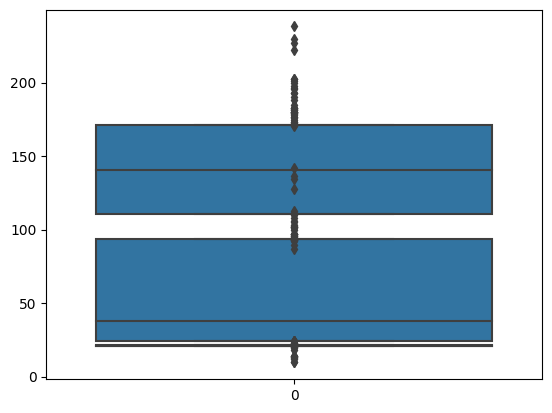

In [9]:
import os
import boto3
s3 = boto3.client('s3')
def main():
    # Set up the S3 client
    bucket_name = 'eoghancs6512'
    file_name = "instrument_price.csv"
    crypto_currency = "SOL"
    object_name = 'data/' + file_name

    # Create local data directory to copy data folder from s3 bucket.
    local_dir_path = '/home/ec2-user/SageMaker/data'

    # Create the local directory if it doesn't already exist
    if not os.path.exists(local_dir_path):
        os.makedirs(local_dir_path)

    # Copying data directory from s3 to local data folder
    s3.download_file(bucket_name, object_name, os.path.join(local_dir_path, 'instrument_price.csv'))

    assignment = bucket_class(bucket_name)
    assignment.execute(file_name, crypto_currency)


if __name__ == "__main__":
    main()
